In [1]:
import pandas as pd

wine = pd.read_csv('data/wine.csv')





# note that the data values are all numeric

print(wine.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

In [2]:
wine['Cultivar'].value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

In [3]:
wine = wine.drop('Cultivar', axis=1)

print(wine.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  Total phenols  \
0    14.23        1.71  2.43                 15.6        127           2.80   
1    13.20        1.78  2.14                 11.2        100           2.65   
2    13.16        2.36  2.67                 18.6        101           2.80   
3    14.37        1.95  2.50                 16.8        113           3.85   
4    13.24        2.59  2.87                 21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline          

In [4]:
from sklearn.cluster import KMeans

In [5]:
# create 3 clusters

# use a random seed of 42

# you can opt to leave out the random_state parameter

# or use a different value; the 42 will ensure your results

# are the same as the one printed in the book

kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)

In [6]:
print(kmeans)

KMeans(n_clusters=3, random_state=42)


In [7]:
import numpy as np

print (np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([69, 47, 62]))


In [8]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

print(kmeans_3.head())

   cluster
0        1
1        1
2        1
3        1
4        2


#### Dimension Reduction With PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2).fit(wine)

In [11]:
pca_trans = pca.transform(wine)





# give our projections a name

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

In [12]:
# concatenate our data

kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)

print(kmeans_3.head())

   cluster        pca1       pca2
0        1  318.562979  21.492131
1        1  303.097420  -5.364718
2        1  438.061133  -6.537309
3        1  733.240139   0.192729
4        2  -11.571428  18.489995


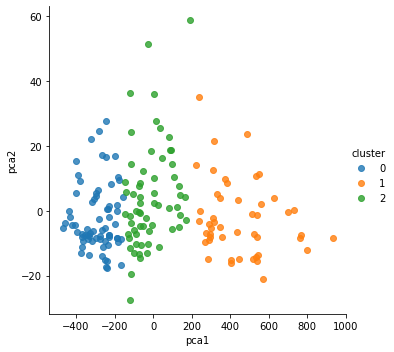

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3,

                 hue='cluster', fit_reg=False)

plt.show()

In [14]:
wine_all = pd.read_csv('data/wine.csv')

print(wine_all.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

In [15]:
pca_all = PCA(n_components=2).fit(wine_all)

pca_all_trans = pca_all.transform(wine_all)

pca_all_trans_df = pd.DataFrame(pca_all_trans,

                                columns=['pca_all_1', 'pca_all_2'])


kmeans_3 = pd.concat([kmeans_3,

                     pca_all_trans_df,

                     wine_all['Cultivar']], axis=1)

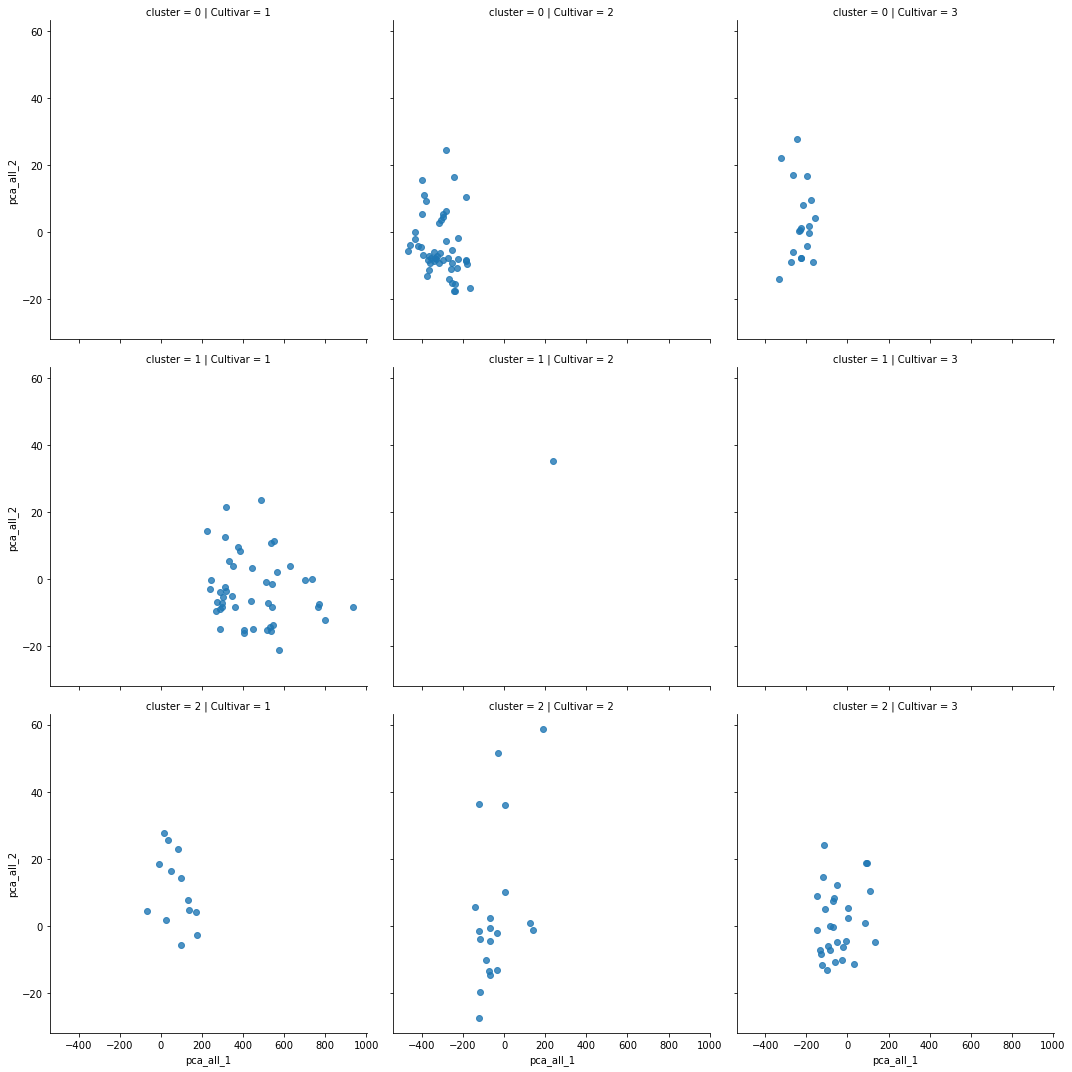

In [16]:
with sns.plotting_context(font_scale=5):

        fig = sns.lmplot(x = 'pca_all_1',

                         y='pca_all_2',

                         data=kmeans_3,

                         row='cluster', col='Cultivar',

                         fit_reg=False)

plt.show()

In [17]:
from scipy.cluster import hierarchy

In [18]:
wine = pd.read_csv('data/wine.csv')

wine = wine.drop('Cultivar', axis=1)

In [19]:
import matplotlib.pyplot as plt

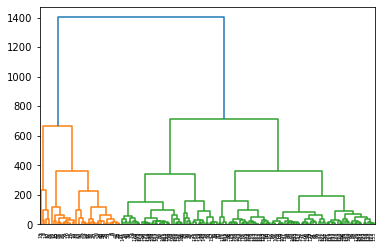

In [20]:
wine_complete = hierarchy.complete(wine)

fig = plt.figure()

dn = hierarchy.dendrogram(wine_complete)

plt.show()

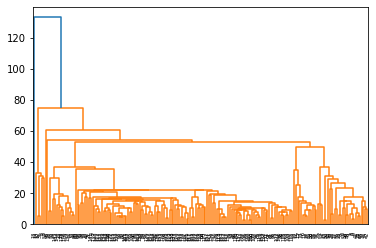

In [21]:
wine_single = hierarchy.single(wine)

fig = plt.figure()

dn = hierarchy.dendrogram(wine_single)


plt.show()

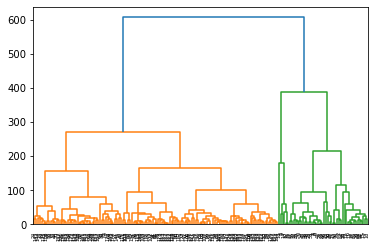

In [22]:
wine_average = hierarchy.average(wine)

fig = plt.figure()

dn = hierarchy.dendrogram(wine_average)

plt.show()

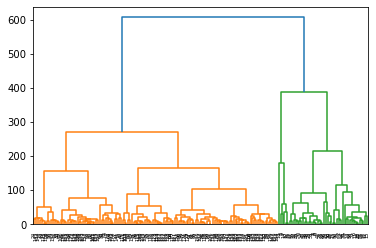

In [23]:
wine_centroid = hierarchy.centroid(wine)

fig = plt.figure()

dn = hierarchy.dendrogram(wine_centroid)

plt.show()

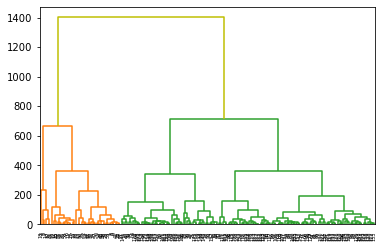

In [24]:
wine_complete = hierarchy.complete(wine)

fig = plt.figure()

dn = hierarchy.dendrogram(

    wine_complete,

    # default MATLAB threshold

    color_threshold=0.7 * max(wine_complete[:,2]),

    above_threshold_color='y')

plt.show()